In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

# vlisulaization
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
from pandas.plotting import scatter_matrix

## 데이터 불러오기

In [2]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")
sub = pd.read_csv("dataset/sample_submission.csv")
info = pd.read_excel("dataset/데이터 명세.xlsx")

In [3]:
datalist = [train, test, sub]
for i in datalist:
    print(i.shape)

(256351, 69)
(90067, 68)
(90067, 2)


### Train

In [4]:
train.head(3)

,ID,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,배아 생성 주요 이유,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,난자 출처,정자 출처,난자 기증자 나이,정자 기증자 나이,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,TRAIN_000000,TRZKPL,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,4.0,5.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,7.0,0.0,5.0,5.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
1,TRAIN_000001,TRYBLT,만45-50세,NaN,IVF,ICSI,0,알 수 없음,0.0,NaN,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
2,TRAIN_000002,TRVNRY,만18-34세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1회,0회,1회,0회,0회,0회,0회,0회,0회,0회,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,7.0,7.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     256351 non-null  object 
 1   시술 시기 코드               256351 non-null  object 
 2   시술 당시 나이               256351 non-null  object 
 3   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 4   시술 유형                  256351 non-null  object 
 5   특정 시술 유형               256349 non-null  object 
 6   배란 자극 여부               256351 non-null  int64  
 7   배란 유도 유형               256351 non-null  object 
 8   단일 배아 이식 여부            250060 non-null  float64
 9   착상 전 유전 검사 사용 여부       2718 non-null    float64
 10  착상 전 유전 진단 사용 여부       250060 non-null  float64
 11  남성 주 불임 원인             256351 non-null  int64  
 12  남성 부 불임 원인             256351 non-null  int64  
 13  여성 주 불임 원인             256351 non-null  int64  
 14  여성 부 불임 원인             256351 non-nu

In [6]:
cat_col = info[info['범주형 여부'] == 1]['컬럼명'].tolist()
num_col = info[info['범주형 여부'] == 0]['컬럼명'].tolist()
cat_col.append("특정 시술 유형")

In [7]:
num_col

['임신 시도 또는 마지막 임신 경과 연수',
 '총 생성 배아 수',
 '미세주입된 난자 수',
 '미세주입에서 생성된 배아 수',
 '이식된 배아 수',
 '미세주입 배아 이식 수',
 '저장된 배아 수',
 '미세주입 후 저장된 배아 수',
 '해동된 배아 수',
 '해동 난자 수',
 '수집된 신선 난자 수',
 '저장된 신선 난자 수',
 '혼합된 난자 수',
 '파트너 정자와 혼합된 난자 수',
 '기증자 정자와 혼합된 난자 수',
 '난자 채취 경과일',
 '난자 해동 경과일',
 '난자 혼합 경과일',
 '배아 이식 경과일',
 '배아 해동 경과일']

# 결측치

In [10]:
# Null 값이 포함된 컬럼만 추출
null_columns = train.columns[train.isna().any()]

# Null 값이 포함된 컬럼들의 null 값 개수 확인
null_counts = train[null_columns].isna().sum()

# Drop columns with more than half of the values missing
#drop_cols = []
#for column in train.columns:
#    if (train[column].notnull().sum() // 2) < train[column].isnull().sum():
#        drop_cols.append(column)
#train_data = train.drop(drop_cols, axis=1)
#print("train shape : ", train_data.shape)

In [11]:
null_columns

Index(['임신 시도 또는 마지막 임신 경과 연수', '특정 시술 유형', '단일 배아 이식 여부', '착상 전 유전 검사 사용 여부',
       '착상 전 유전 진단 사용 여부', '배아 생성 주요 이유', '총 생성 배아 수', '미세주입된 난자 수',
       '미세주입에서 생성된 배아 수', '이식된 배아 수', '미세주입 배아 이식 수', '저장된 배아 수',
       '미세주입 후 저장된 배아 수', '해동된 배아 수', '해동 난자 수', '수집된 신선 난자 수', '저장된 신선 난자 수',
       '혼합된 난자 수', '파트너 정자와 혼합된 난자 수', '기증자 정자와 혼합된 난자 수', '동결 배아 사용 여부',
       '신선 배아 사용 여부', '기증 배아 사용 여부', '대리모 여부', 'PGD 시술 여부', 'PGS 시술 여부',
       '난자 채취 경과일', '난자 해동 경과일', '난자 혼합 경과일', '배아 이식 경과일', '배아 해동 경과일'],
      dtype='object')

In [25]:
list(set(null_columns) & set(cat_col))

['기증 배아 사용 여부',
 '단일 배아 이식 여부',
 'PGS 시술 여부',
 '특정 시술 유형',
 '착상 전 유전 검사 사용 여부',
 '착상 전 유전 진단 사용 여부',
 'PGD 시술 여부',
 '대리모 여부',
 '신선 배아 사용 여부',
 '동결 배아 사용 여부',
 '배아 생성 주요 이유']

In [20]:
len(num_col)

20


결측치가 있는 열의 수:
31


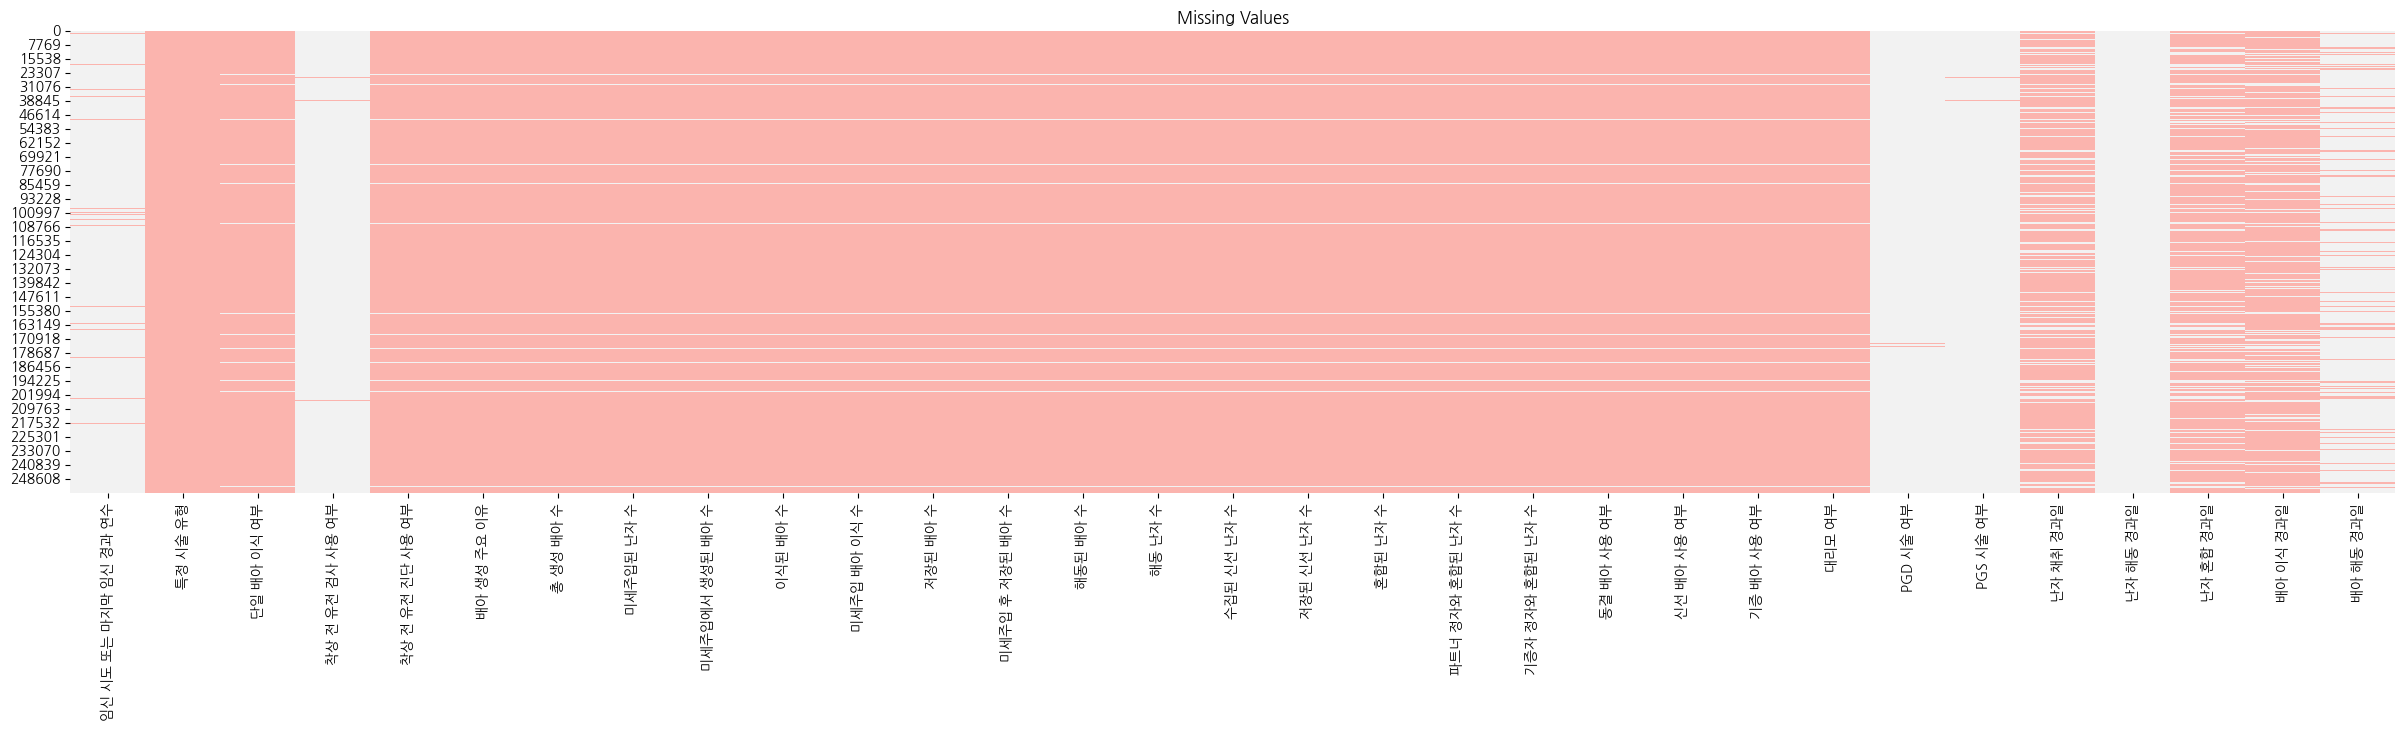

In [75]:
# 2. 결측치 열 수 출력
missing_values = train[null_columns].isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("\n결측치가 있는 열의 수:")
print(len(missing_columns))

# 3. 결측치 시각화
plt.figure(figsize=(30, 6))
sns.heatmap(train[null_columns].isnull(), cbar=False, cmap='Pastel1', annot=False)
plt.title('Missing Values')
plt.show()

### Target

In [58]:
train[['임신 성공 여부']].value_counts()

임신 성공 여부
0           190123
1            66228
Name: count, dtype: int64

In [26]:
train.loc[:, train.nunique(dropna=True) == 1]

,착상 전 유전 검사 사용 여부,불임 원인 - 여성 요인,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일
0,NaN,0,NaN,NaN,0.0
1,NaN,0,NaN,NaN,0.0
2,NaN,0,NaN,NaN,0.0
3,NaN,0,NaN,NaN,0.0
4,NaN,0,NaN,NaN,0.0
...,...,...,...,...,...
256346,NaN,0,NaN,NaN,0.0
256347,NaN,0,NaN,NaN,0.0
256348,NaN,0,NaN,NaN,0.0
256349,NaN,0,NaN,NaN,0.0


In [60]:
66228/190123

0.34834291484986035

# 변수별 target 비율

In [17]:
import pandas as pd

# 범주형 변수들의 target(임신 성공 여부) 비율 및 개수 계산
def calculate_category_ratios(train, cat_col, target="임신 성공 여부"):
    for col in cat_col:
        counts = train.groupby(col)[target].value_counts(normalize=False).unstack()
        counts_ratio = train.groupby(col)[target].value_counts(normalize=True).unstack()
        
        # 컬럼명 지정
        counts.columns = ["count_0", "count_1"]  # 0과 1의 개수
        counts_ratio.columns = ["비율_0", "비율_1"]  # 0과 1의 비율
        
        # 데이터 병합
        combined = counts.merge(counts_ratio, left_index=True, right_index=True)
        combined = combined.reset_index()
        combined["1/0 비율"] = combined["비율_1"] / combined["비율_0"]  # 1의 비율 / 0의 비율 계산
        combined["0/1 비율"] = combined["비율_0"] / combined["비율_1"]  # 1의 비율 / 0의 비율 계산
        
        # 변수별 개별 출력
        print(f"\n📌 변수: {col}")
        display(pd.DataFrame(combined))

# 비율 분석 실행 (변수별로 개별 출력)
calculate_category_ratios(train, cat_col)


📌 변수: 시술 시기 코드


,시술 시기 코드,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,TRCMWS,28285,9805,0.742583,0.257417,0.346650,2.884753
1,TRDQAZ,29405,9564,0.754574,0.245426,0.325251,3.074550
2,TRJXFG,26437,9594,0.733729,0.266271,0.362900,2.755576
3,TRVNRY,26776,9397,0.740221,0.259779,0.350949,2.849420
4,TRXQMD,25910,8921,0.743878,0.256122,0.344307,2.904383
5,TRYBLT,26834,9879,0.730913,0.269087,0.368152,2.716267
6,TRZKPL,26476,9068,0.744880,0.255120,0.342499,2.919718



📌 변수: 시술 당시 나이


,시술 당시 나이,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,만18-34세,69415.0,33061.0,0.677378,0.322622,0.476280,2.099604
1,만35-37세,41694.0,16086.0,0.721599,0.278401,0.385811,2.591943
2,만38-39세,30725.0,8522.0,0.782862,0.217138,0.277364,3.605374
3,만40-42세,31395.0,5953.0,0.840607,0.159393,0.189616,5.273812
4,만43-44세,10807.0,1446.0,0.881988,0.118012,0.133802,7.473721
5,만45-50세,5758.0,1160.0,0.832321,0.167679,0.201459,4.963793
6,알 수 없음,329.0,NaN,1.000000,NaN,NaN,NaN



📌 변수: 시술 유형


,시술 유형,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,DI,5480,811,0.871086,0.128914,0.147993,6.757090
1,IVF,184643,65417,0.738395,0.261605,0.354289,2.822554



📌 변수: 배란 자극 여부


,배란 자극 여부,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0,45049,13582,0.768348,0.231652,0.301494,3.316816
1,1,145074,52646,0.733735,0.266265,0.362891,2.755651



📌 변수: 배란 유도 유형


,배란 유도 유형,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,기록되지 않은 시행,142245.0,52187.0,0.731593,0.268407,0.366881,2.725679
1,생식선 자극 호르몬,NaN,1.0,NaN,1.000000,NaN,NaN
2,세트로타이드 (억제제),1.0,NaN,1.000000,NaN,NaN,NaN
3,알 수 없음,47877.0,14040.0,0.773245,0.226755,0.293251,3.410043



📌 변수: 단일 배아 이식 여부


,단일 배아 이식 여부,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0.0,147700,43977,0.770567,0.229433,0.297745,3.358574
1,1.0,36943,21440,0.632770,0.367230,0.580354,1.723088



📌 변수: 착상 전 유전 검사 사용 여부


,착상 전 유전 검사 사용 여부,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,1.0,2315,403,0.851729,0.148271,0.174082,5.744417



📌 변수: 착상 전 유전 진단 사용 여부


,착상 전 유전 진단 사용 여부,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0.0,182061,64803,0.737495,0.262505,0.355941,2.809453
1,1.0,2582,614,0.807885,0.192115,0.237800,4.205212



📌 변수: 남성 주 불임 원인


,남성 주 불임 원인,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0,184421,64620,0.740525,0.259475,0.350394,2.853931
1,1,5702,1608,0.780027,0.219973,0.282006,3.546020



📌 변수: 남성 부 불임 원인


,남성 부 불임 원인,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0,187425,65564,0.740842,0.259158,0.349815,2.858657
1,1,2698,664,0.802499,0.197501,0.246108,4.063253



📌 변수: 여성 주 불임 원인


,여성 주 불임 원인,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0,183973,64502,0.740408,0.259592,0.350606,2.852206
1,1,6150,1726,0.780853,0.219147,0.280650,3.563152



📌 변수: 여성 부 불임 원인


,여성 부 불임 원인,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0,187560,65604,0.740864,0.259136,0.349776,2.858972
1,1,2563,624,0.804205,0.195795,0.243465,4.107372



📌 변수: 부부 주 불임 원인


,부부 주 불임 원인,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0,183513,64361,0.740348,0.259652,0.350716,2.851307
1,1,6610,1867,0.779757,0.220243,0.282451,3.540439



📌 변수: 부부 부 불임 원인


,부부 부 불임 원인,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0,188296,65808,0.741019,0.258981,0.349492,2.861293
1,1,1827,420,0.813084,0.186916,0.229885,4.350000



📌 변수: 불명확 불임 원인


,불명확 불임 원인,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0,142525,49551,0.742024,0.257976,0.347665,2.876329
1,1,47598,16677,0.740537,0.259463,0.350372,2.854110



📌 변수: 불임 원인 - 난관 질환


,불임 원인 - 난관 질환,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0,163731,57063,0.741555,0.258445,0.348517,2.869302
1,1,26392,9165,0.742245,0.257755,0.347264,2.879651



📌 변수: 불임 원인 - 남성 요인


,불임 원인 - 남성 요인,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0,121377,39508,0.754433,0.245567,0.325498,3.072213
1,1,68746,26720,0.720110,0.279890,0.388677,2.572829



📌 변수: 불임 원인 - 배란 장애


,불임 원인 - 배란 장애,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0,166278,56647,0.745892,0.254108,0.340676,2.935336
1,1,23845,9581,0.713367,0.286633,0.401803,2.488780



📌 변수: 불임 원인 - 여성 요인


,불임 원인 - 여성 요인,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0,190123,66228,0.741651,0.258349,0.348343,2.870734



📌 변수: 불임 원인 - 자궁경부 문제


,불임 원인 - 자궁경부 문제,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0,190113.0,66228.0,0.741641,0.258359,0.348361,2.870583
1,1,10.0,NaN,1.000000,NaN,NaN,NaN



📌 변수: 불임 원인 - 자궁내막증


,불임 원인 - 자궁내막증,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0,176485,61564,0.741381,0.258619,0.348834,2.866692
1,1,13638,4664,0.745164,0.254836,0.341986,2.924099



📌 변수: 불임 원인 - 정자 농도


,불임 원인 - 정자 농도,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0,189916,66159,0.741642,0.258358,0.348359,2.8706
1,1,207,69,0.750000,0.250000,0.333333,3.0000



📌 변수: 불임 원인 - 정자 면역학적 요인


,불임 원인 - 정자 면역학적 요인,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0,190122.0,66228.0,0.74165,0.25835,0.348345,2.870719
1,1,1.0,NaN,1.00000,NaN,NaN,NaN



📌 변수: 불임 원인 - 정자 운동성


,불임 원인 - 정자 운동성,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0,190043,66211,0.741620,0.258380,0.3484,2.870263
1,1,80,17,0.824742,0.175258,0.2125,4.705882



📌 변수: 불임 원인 - 정자 형태


,불임 원인 - 정자 형태,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0,190012,66196,0.741632,0.258368,0.348378,2.870445
1,1,111,32,0.776224,0.223776,0.288288,3.468750



📌 변수: 배아 생성 주요 이유


,배아 생성 주요 이유,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,기증용,1108.0,NaN,1.000000,NaN,NaN,NaN
1,"기증용, 난자 저장용",44.0,NaN,1.000000,NaN,NaN,NaN
2,"기증용, 배아 저장용",125.0,NaN,1.000000,NaN,NaN,NaN
3,"기증용, 배아 저장용, 현재 시술용",13.0,7.0,0.650000,0.350000,0.538462,1.857143
4,"기증용, 현재 시술용",2347.0,1437.0,0.620243,0.379757,0.612271,1.633264
5,난자 저장용,1959.0,NaN,1.000000,NaN,NaN,NaN
6,"난자 저장용, 배아 저장용",6.0,NaN,1.000000,NaN,NaN,NaN
7,"난자 저장용, 배아 저장용, 연구용",1.0,NaN,1.000000,NaN,NaN,NaN
8,"난자 저장용, 현재 시술용",4.0,1.0,0.800000,0.200000,0.250000,4.000000
9,배아 저장용,9184.0,8.0,0.999130,0.000870,0.000871,1148.000000



📌 변수: 총 시술 횟수


,총 시술 횟수,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0회,69199,28400,0.709013,0.290987,0.410411,2.436585
1,1회,42617,14202,0.750048,0.249952,0.333247,3.000775
2,2회,29733,9605,0.755834,0.244166,0.323042,3.095575
3,3회,18733,5798,0.763646,0.236354,0.309507,3.230942
4,4회,11692,3449,0.772208,0.227792,0.294988,3.389968
5,5회,7141,1965,0.784208,0.215792,0.275172,3.634097
6,6회 이상,11008,2809,0.796700,0.203300,0.255178,3.918832



📌 변수: 클리닉 내 총 시술 횟수


,클리닉 내 총 시술 횟수,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0회,87251,34424,0.717082,0.282918,0.394540,2.534598
1,1회,45091,14662,0.754623,0.245377,0.325165,3.075365
2,2회,26338,8224,0.762051,0.237949,0.312248,3.202578
3,3회,14090,4267,0.767555,0.232445,0.302839,3.302086
4,4회,7795,2223,0.778099,0.221901,0.285183,3.506523
5,5회,4276,1120,0.792439,0.207561,0.261927,3.817857
6,6회 이상,5282,1308,0.801517,0.198483,0.247633,4.038226



📌 변수: IVF 시술 횟수


,IVF 시술 횟수,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0회,74182,29752,0.713741,0.286259,0.401068,2.493345
1,1회,43721,14618,0.749430,0.250570,0.334347,2.990902
2,2회,29561,9616,0.754550,0.245450,0.325293,3.074147
3,3회,17797,5483,0.764476,0.235524,0.308086,3.245851
4,4회,10553,3107,0.772548,0.227452,0.294419,3.396524
5,5회,6142,1660,0.787234,0.212766,0.270270,3.700000
6,6회 이상,8167,1992,0.803918,0.196082,0.243908,4.099900



📌 변수: DI 시술 횟수


,DI 시술 횟수,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0회,179265,63199,0.739347,0.260653,0.352545,2.836516
1,1회,2359,561,0.807877,0.192123,0.237813,4.204991
2,2회,2353,653,0.782768,0.217232,0.277518,3.603369
3,3회,2361,755,0.757702,0.242298,0.319780,3.127152
4,4회,1346,381,0.779386,0.220614,0.283061,3.532808
5,5회,975,226,0.811823,0.188177,0.231795,4.314159
6,6회 이상,1464,453,0.763693,0.236307,0.309426,3.231788



📌 변수: 총 임신 횟수


,총 임신 횟수,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0회,152538,52888,0.742545,0.257455,0.346720,2.884170
1,1회,32306,11523,0.737092,0.262908,0.356683,2.803610
2,2회,4635,1611,0.742075,0.257925,0.347573,2.877095
3,3회,563,183,0.754692,0.245308,0.325044,3.076503
4,4회,73,20,0.784946,0.215054,0.273973,3.650000
5,5회,6,2,0.750000,0.250000,0.333333,3.000000
6,6회 이상,2,1,0.666667,0.333333,0.500000,2.000000



📌 변수: IVF 임신 횟수


,IVF 임신 횟수,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0회,154792.0,53500.0,0.743149,0.256851,0.345625,2.893308
1,1회,30458.0,11061.0,0.733592,0.266408,0.363156,2.753639
2,2회,4306.0,1482.0,0.743953,0.256047,0.344171,2.905533
3,3회,499.0,164.0,0.752640,0.247360,0.328657,3.042683
4,4회,62.0,19.0,0.765432,0.234568,0.306452,3.263158
5,5회,6.0,1.0,0.857143,0.142857,0.166667,6.000000
6,6회 이상,NaN,1.0,NaN,1.000000,NaN,NaN



📌 변수: DI 임신 횟수


,DI 임신 횟수,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0회,187735.0,65567.0,0.741151,0.258849,0.349253,2.863254
1,1회,2076.0,549.0,0.790857,0.209143,0.264451,3.781421
2,2회,267.0,101.0,0.725543,0.274457,0.378277,2.643564
3,3회,38.0,10.0,0.791667,0.208333,0.263158,3.800000
4,4회,5.0,NaN,1.000000,NaN,NaN,NaN
5,5회,2.0,1.0,0.666667,0.333333,0.500000,2.000000



📌 변수: 총 출산 횟수


,총 출산 횟수,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0회,162419.0,56136.0,0.743149,0.256851,0.345625,2.893313
1,1회,25917.0,9452.0,0.732760,0.267240,0.364703,2.741959
2,2회,1652.0,590.0,0.736842,0.263158,0.357143,2.800000
3,3회,122.0,47.0,0.721893,0.278107,0.385246,2.595745
4,4회,10.0,3.0,0.769231,0.230769,0.300000,3.333333
5,5회,1.0,NaN,1.000000,NaN,NaN,NaN
6,6회 이상,2.0,NaN,1.000000,NaN,NaN,NaN



📌 변수: IVF 출산 횟수


,IVF 출산 횟수,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0회,164178.0,56653.0,0.743455,0.256545,0.345071,2.897958
1,1회,24348.0,9000.0,0.730119,0.269881,0.369640,2.705333
2,2회,1490.0,531.0,0.737259,0.262741,0.356376,2.806026
3,3회,96.0,41.0,0.700730,0.299270,0.427083,2.341463
4,4회,10.0,3.0,0.769231,0.230769,0.300000,3.333333
5,5회,1.0,NaN,1.000000,NaN,NaN,NaN



📌 변수: DI 출산 횟수


,DI 출산 횟수,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0회,188318.0,65691.0,0.741383,0.258617,0.348830,2.866725
1,1회,1648.0,490.0,0.770814,0.229186,0.297330,3.363265
2,2회,140.0,43.0,0.765027,0.234973,0.307143,3.255814
3,3회,15.0,4.0,0.789474,0.210526,0.266667,3.750000
4,5회,2.0,NaN,1.000000,NaN,NaN,NaN



📌 변수: 난자 출처


,난자 출처,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,기증 제공,10795,4974,0.684571,0.315429,0.460769,2.170285
1,본인 제공,173848,60443,0.742017,0.257983,0.347677,2.876230
2,알 수 없음,5480,811,0.871086,0.128914,0.147993,6.757090



📌 변수: 정자 출처


,정자 출처,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,기증 제공,20431.0,6585.0,0.756256,0.243744,0.322304,3.102658
1,미할당,109.0,13.0,0.893443,0.106557,0.119266,8.384615
2,배우자 및 기증 제공,14.0,NaN,1.000000,NaN,NaN,NaN
3,배우자 제공,169569.0,59630.0,0.739833,0.260167,0.351656,2.843686



📌 변수: 난자 기증자 나이


,난자 기증자 나이,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,만20세 이하,217,77,0.738095,0.261905,0.354839,2.818182
1,만21-25세,1564,770,0.670094,0.329906,0.492327,2.031169
2,만26-30세,3243,1733,0.651728,0.348272,0.534382,1.871321
3,만31-35세,4423,1943,0.694785,0.305215,0.439295,2.276377
4,알 수 없음,180676,61705,0.745421,0.254579,0.341523,2.928061



📌 변수: 정자 기증자 나이


,정자 기증자 나이,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,만20세 이하,843,224,0.790066,0.209934,0.265718,3.763393
1,만21-25세,4299,1368,0.758602,0.241398,0.318214,3.142544
2,만26-30세,3803,1255,0.751878,0.248122,0.330003,3.030279
3,만31-35세,3690,1221,0.751374,0.248626,0.330894,3.022113
4,만36-40세,3984,1298,0.754260,0.245740,0.325803,3.069337
5,만41-45세,2913,935,0.757017,0.242983,0.320975,3.115508
6,알 수 없음,170591,59927,0.740033,0.259967,0.351291,2.846647



📌 변수: 동결 배아 사용 여부


,동결 배아 사용 여부,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0.0,153722,56212,0.732240,0.267760,0.365673,2.734683
1,1.0,30921,9205,0.770598,0.229402,0.297694,3.359153



📌 변수: 신선 배아 사용 여부


,신선 배아 사용 여부,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0.0,30758,9166,0.770414,0.229586,0.298004,3.355662
1,1.0,153885,56251,0.732311,0.267689,0.365539,2.735685



📌 변수: 기증 배아 사용 여부


,기증 배아 사용 여부,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0.0,182990,64612,0.739049,0.260951,0.353090,2.832136
1,1.0,1653,805,0.672498,0.327502,0.486993,2.053416



📌 변수: 대리모 여부


,대리모 여부,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,0.0,183897,65114,0.738510,0.261490,0.354079,2.824231
1,1.0,746,303,0.711153,0.288847,0.406166,2.462046



📌 변수: PGD 시술 여부


,PGD 시술 여부,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,1.0,1570,609,0.720514,0.279486,0.387898,2.577997



📌 변수: PGS 시술 여부


,PGS 시술 여부,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,1.0,1531,398,0.793675,0.206325,0.259961,3.846734



📌 변수: 특정 시술 유형


,특정 시술 유형,count_0,count_1,비율_0,비율_1,1/0 비율,0/1 비율
0,FER,2.0,1.0,0.666667,0.333333,0.500000,2.000000
1,GIFT,2.0,NaN,1.000000,NaN,NaN,NaN
2,Generic DI,59.0,12.0,0.830986,0.169014,0.203390,4.916667
3,ICI,83.0,13.0,0.864583,0.135417,0.156627,6.384615
4,ICSI,88983.0,33385.0,0.727175,0.272825,0.375184,2.665359
5,ICSI / AH,602.0,167.0,0.782835,0.217165,0.277409,3.604790
6,ICSI / AH:Unknown,1.0,1.0,0.500000,0.500000,1.000000,1.000000
7,ICSI / BLASTOCYST,1035.0,574.0,0.643257,0.356743,0.554589,1.803136
8,ICSI / BLASTOCYST :ICSI,NaN,1.0,NaN,1.000000,NaN,NaN
9,ICSI / BLASTOCYST :IVF / BLASTOCYST,3.0,1.0,0.750000,0.250000,0.333333,3.000000


In [ ]:
# 변수별 범주 개수 계산
grouped_dfs = {}
for col in cat_col:
    unique_val = train[col].nunique()
    if unique_val not in grouped_dfs:
        grouped_dfs[unique_val] = []
    grouped_dfs[unique_val].append(category_ratio_df[category_ratio_df["변수명"] == col])

# 각 그룹별 데이터프레임 확인
for unique_val, df_list in grouped_dfs.items():
    df = pd.concat(df_list, ignore_index=True)
    print(f"\n🔹 범주 개수가 {unique_val}개인 변수들:")
    try:
        from IPython.display import display
        display(df[["변수명", "범주명", "1/0 비율"]])
    except ImportError:
        print(df[["변수명", "범주명", "1/0 비율"]])

In [78]:
train[cat_col][['특정 시술 유형']].value_counts()

특정 시술 유형                           
ICSI                                   122368
IVF                                     91755
Unknown                                 26939
IUI                                      6100
ICSI:ICSI                                2314
ICSI / BLASTOCYST                        1609
IVF / BLASTOCYST                         1248
IVF:IVF                                  1146
ICSI:IVF                                  873
ICSI / AH                                 769
IVF:ICSI                                  392
IVF / AH                                  319
ICSI:Unknown                              207
IVF:Unknown                               100
ICI                                        96
Generic DI                                 71
IVI                                        23
ICSI / BLASTOCYST:IVF / BLASTOCYST          6
ICSI / BLASTOCYST :IVF / BLASTOCYST         4
FER                                         3
GIFT                                        

# 연속형 변수들 분포 확인

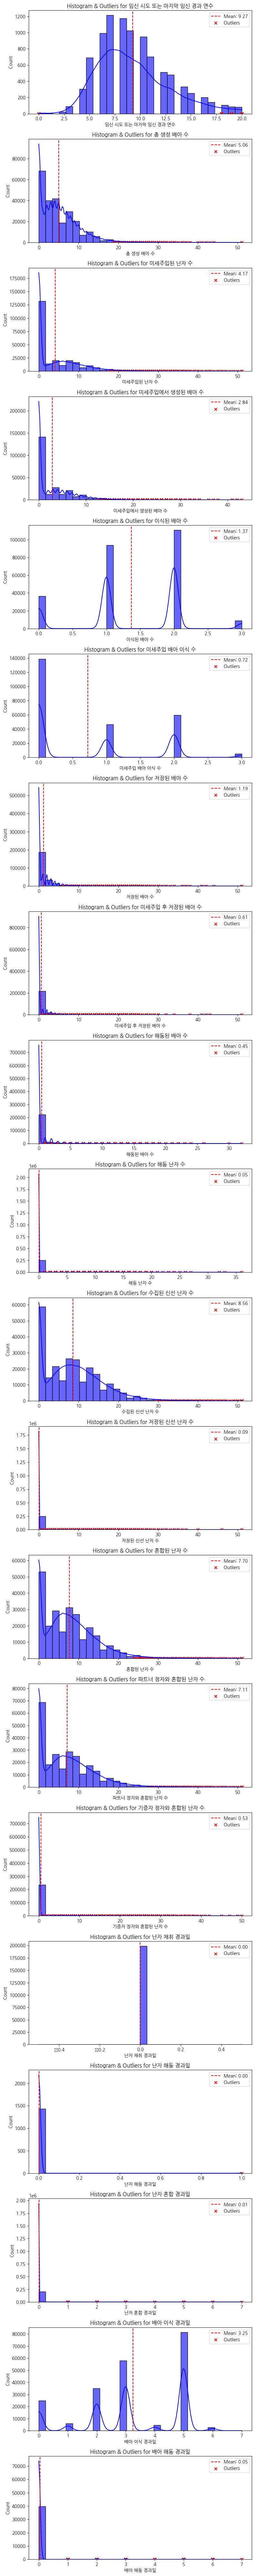

In [80]:
# 재설정된 환경에서 필요한 라이브러리 다시 로드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램 및 이상값 탐색 함수
def plot_histograms_with_outliers(df, num_cols):
    num_features = len(num_cols)
    fig, axes = plt.subplots(num_features, 1, figsize=(8, 4 * num_features))

    if num_features == 1:
        axes = [axes]

    for i, col in enumerate(num_cols):
        ax = axes[i]

        # 데이터 및 이상값 계산 (IQR 방식)
        data = df[col].dropna()
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        mean_value = data.mean()

        # 히스토그램 생성
        sns.histplot(data, bins=30, kde=True, ax=ax, color="blue", alpha=0.6)
        ax.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
        
        # 이상값 표시
        ax.scatter(outliers, [0] * len(outliers), color='red', label='Outliers', marker='x')

        # 라벨 및 제목 설정
        ax.set_title(f'Histogram & Outliers for {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.legend()

    plt.tight_layout()
    plt.show()

# 예시 플랏 실행
plot_histograms_with_outliers(train, num_col)
